## Movie Recommendation System

Everyone loves movies irrespective of age, gender, race, color, or geographical location. We all in a way are connected to each other via this amazing medium. Yet what most interesting is the fact that how unique our choices and combinations are in terms of movie preferences.


Movie Recommendation System suggesting “relevant” items to users.


Therefore the main focus of our recommendation system is to filter and predict only those movies which a user would prefer given movie name watched already.

### MovieLens 20M Dataset  
 
 -- by grouplens.org
 
 
--> 20 million ratings 

--> 465,000 tag applications applied to 27,000 movies by 138,000 users.



lets say person who hasnt watch ' toy story movie' , calculate similar users similar to me, see who are the top 10 users and what ratings they give to toy story movie and predict " average rating" or "weighted average"  for me.

## -- user based Collaborative Filtering

similar people will have similar taste,using this logic, we recommends items by finding similar users to the active user(to whom we are trying to recommend a movie).

## -- Item-Based Collaborative Filtering

finding similarity between all the item pairs using Cosine Similarity.

# -- Dimensionality Reduction

In User-Item matrix, there are no. of user and no. of items. and it is also a SPARSE matrix (having most no. of 0's). reducing dimesnions improve performance in terms of space and time.   

Like - m x n = product of two matrix X and Y with dimensions m x p and p x n respectively. 


These X and Y actually represent users and items differently. p = latent features. More the p, better the model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 3 files in datasets

movies = pd.read_csv(r"movie.csv")
tags = pd.read_csv(r"tag.csv")
ratings = pd.read_csv(r"rating.csv")

In [3]:
movies.head() 

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
index = movies.loc[movies['movieId'] == 285].index[0]

In [5]:
print(movies.loc[index])

movieId                     285
title      Beyond Bedlam (1993)
genres             Drama|Horror
Name: 282, dtype: object


In [6]:
movies.shape  # 27K movies

(27278, 3)

In [7]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [8]:
tags.shape  #4 lakhs of tags given by different users.

(465564, 4)

In [9]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [10]:
ratings.shape  # 2 crores of ratings are given by different users to different movies.

(20000263, 4)

In [11]:
movies['genres'] = movies['genres'].str.replace('|',' ')

C:\Users\User\AppData\Local\Temp\ipykernel_16056\1845334057.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movies['genres'] = movies['genres'].str.replace('|',' ')


In [12]:
len(movies.movieId.unique())    #no. of unique movies

27278

In [13]:
len(ratings.movieId.unique())       #no. of unique movies in ratings dataset

26744

In [14]:

# Check the sample info
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000053 entries, 7935843 to 18406350
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 152.6+ MB
None


In [15]:
ratings.shape

(4000053, 4)

### Filter ratings dataset on basis of no. of movies rated by user --> consider only those users who rated atleast 55 movies.  Help in reducing data, and making quality better.

In [16]:

ratings_f = ratings.groupby('userId').filter(lambda x: len(x) >= 20)

movie_list_rating = ratings_f.movieId.unique().tolist()

In [17]:
ratings_f.shape   # now only 

(2119121, 4)

In [18]:
# we have kept 73% of original movie title in ratings dataframe
len(ratings_f.movieId.unique())/len(movies.movieId.unique()) * 100


73.1211965686634

In [19]:
#But only 13 % of users
len(ratings_f.userId.unique())/len(ratings.userId.unique()) * 100

13.358075859429718

# CONTENT BASED FILTERING

In [20]:
#filterING movie dataframe
movies = movies[movies.movieId.isin(movie_list_rating)]

In [21]:
movies.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance


In [22]:
movies.shape

(19946, 3)

In [23]:
# map movie to id:
Mapping_file = dict(zip(movies.title.tolist(), movies.movieId.tolist()))

In [24]:
tags.drop(['timestamp'],1, inplace = True)
ratings_f.drop(['timestamp'],1, inplace = True)

C:\Users\User\AppData\Local\Temp\ipykernel_16056\1988570541.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tags.drop(['timestamp'],1, inplace = True)
C:\Users\User\AppData\Local\Temp\ipykernel_16056\1988570541.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ratings_f.drop(['timestamp'],1, inplace = True)


## Merge the movies and the tags df , create a metadata attribute for each movie

In [25]:
#create  a mixed df of movie title ,genres
mixed = pd.merge(movies, tags, on= 'movieId', how='left')
mixed.head(3)

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1644.0,Watched
1,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1741.0,computer animation
2,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1741.0,Disney animated feature


In [26]:
#create Final df from tags and genres

mixed.fillna("", inplace= True)
mixed = pd.DataFrame(mixed.groupby('movieId')['tag'].apply(lambda x: "%s" % ' '.join(x)))

Final = pd.merge(movies, mixed, on ='movieId', how = 'left')

Final['metadata'] = Final[['tag','genres']].apply(lambda x:' '.join(x), axis=1)

Final[['movieId','title','genres','metadata']].head(10)


,movieId,title,genres,metadata
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,Watched computer animation Disney animated fea...
1,2,Jumanji (1995),Adventure Children Fantasy,time travel adapted from:book board game child...
2,3,Grumpier Old Men (1995),Comedy Romance,old people that is actually funny sequel fever...
3,4,Waiting to Exhale (1995),Comedy Drama Romance,chick flick revenge characters chick flick cha...
4,5,Father of the Bride Part II (1995),Comedy,Diane Keaton family sequel Steve Martin weddin...
5,6,Heat (1995),Action Crime Thriller,realistic action Al Pacino Michael Mann Robert...
6,7,Sabrina (1995),Comedy Romance,Greg Kinnear romance remadeAs:Sabrina(1995) re...
7,8,Tom and Huck (1995),Adventure Children,adapted from:book author:Mark Twain Library Sy...
8,9,Sudden Death (1995),Action,action jean-claude van damme Peter Hyams Jean-...
9,10,GoldenEye (1995),Action Adventure Thriller,007 (series) assassin killer as protagonist mu...


In [27]:
Final.shape

(19946, 5)

In [28]:
Final.loc[1, 'metadata']

'time travel adapted from:book board game childhood recaptured game herds of CGI animals scary see also:Zathura time time travel board game fantasy Robin Williams scary time travel Robin Williams Joe Johnston Robin Williams kid flick jungle Robin Williams board game Robin Williams animals Lebbat Robin Williams time travel adventure Robin Williams Children Fantasy Robin Williams Dynamic CGI Action Kirsten Dunst Robin Williams Robin Williams fantasy kid flick animals animals fantasy For children fantasy adapted from:book childish Children kid flick time travel Joe Johnston fantasy Robin Williams time travel animals board game children fantasy Kirsten Dunst Robin Williams time travel board game time travel Children kid flick Filmed in BC fantasy Robin Williams animals bad cgi based on a book board game Chris Van Allsburg Robin Williams Robin Williams game magic board game monkey adapted from:book animals bad cgi based on a book board game childhood recaptured Children Chris Van Allsburg f

### creating a content latent matrix from movie metadata, using vector - metadata

tf idf vectors and truncated SVD

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')
tfidf_matrix = tfidf.fit_transform(Final['metadata'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index = Final.index.tolist())
print(tfidf_df.shape)

(19946, 22654)


In [30]:
tfidf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,22644,22645,22646,22647,22648,22649,22650,22651,22652,22653
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
tfidf_df.shape


(19946, 22654)

In [32]:
tfidf_df.loc[0]  #sparse matrix

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
22649    0.0
22650    0.0
22651    0.0
22652    0.0
22653    0.0
Name: 0, Length: 22654, dtype: float64

### now apply dimensionality reduction to tfidf_df matrix

### using SVD which is best suitable for sparse matrix as we have huge amount of sparse data

### amount of variance in data keep on decreasing by the feature. 

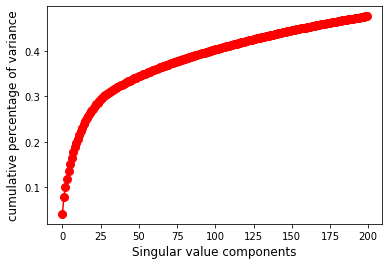

In [33]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components = 200)
latent_matrix = svd.fit_transform(tfidf_df)

#plot var explained
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 16, color = 'red')
plt.xlabel('Singular value components', fontsize = 12)
plt.ylabel('cumulative percentage of variance', fontsize = 12)
plt.show()


In [34]:
n = 200
latent_matrix_1_df = pd.DataFrame(latent_matrix[:,0:n], index=[Final.title.tolist()])

In [35]:
latent_matrix.shape

(19946, 200)

# Collaborative Filtering

### It matches users with same interests and gives recommendations based on their likes.

In [36]:
#creating a collaborative latent matrix fromuser ratings

In [37]:
ratings_f.head()

,userId,movieId,rating
7935843,54675,2683,3.5
12143821,83891,7234,0.5
19509113,135012,3744,3.0
3653662,24893,2117,3.0
6230261,42871,1221,3.5


In [3]:
ratings_f1 = pd.merge(movies[['movieId']], ratings_f, on = 'movieId', how='right')


NameError: name 'pd' is not defined

In [1]:
ratings_f1.shape

NameError: name 'ratings_f1' is not defined

In [39]:
ratings_f2 = ratings_f.pivot(index = 'movieId', columns = 'userId', values = 'rating').fillna(0)

In [40]:
ratings_f2.head()    # 0 if movie haven't watched

userId,7,11,24,53,54,58,69,91,96,104,...,138437,138454,138456,138457,138459,138467,138472,138474,138483,138493
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,4.5,4.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
ratings_f2.shape

(19946, 18500)

In [42]:
len(ratings_f.movieId.unique())

19946

In [43]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components = 200)
latent_matrix_2 = svd.fit_transform(ratings_f2)
latent_matrix_2_df =  pd.DataFrame(latent_matrix_2, index = Final.title.tolist())

In [44]:
latent_matrix_2.shape

(19946, 200)

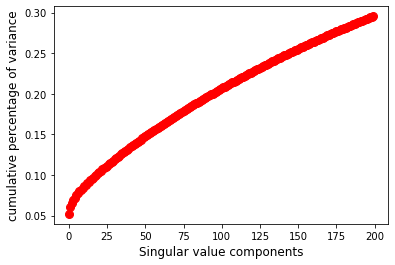

In [45]:
#plot var explained
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 16, color = 'red')
plt.xlabel('Singular value components', fontsize = 12)
plt.ylabel('cumulative percentage of variance', fontsize = 12)
plt.show()

In [46]:
latent_matrix_1_df.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Toy Story (1995),0.033222,0.054367,0.021919,0.008179,0.005206,-0.033447,-0.081085,0.105083,0.003392,0.137571,...,0.190235,0.016679,-0.050878,-0.041572,0.006237,-0.037948,0.034187,0.027419,-0.021108,0.007098
Jumanji (1995),0.013464,0.012318,0.031149,0.004643,0.017135,-0.005787,-0.046792,0.064040,0.011022,0.070717,...,0.022197,-0.012799,-0.005181,0.013810,0.002209,0.030002,0.026926,-0.015471,0.037663,-0.035470
Grumpier Old Men (1995),0.046307,0.071797,-0.004861,-0.000270,0.031467,-0.000955,-0.003827,-0.005567,-0.000686,0.000756,...,-0.009773,-0.015043,0.002286,-0.013940,-0.006536,0.006147,0.003155,0.000759,0.003757,0.010555
Waiting to Exhale (1995),0.149315,0.067396,-0.022922,-0.000108,0.102612,0.004068,-0.011479,-0.024247,-0.000078,-0.002056,...,0.150793,0.029776,0.011327,-0.068948,-0.002849,0.007779,-0.032017,-0.016291,-0.012313,-0.040106
Father of the Bride Part II (1995),0.047975,0.085011,0.002405,0.001603,-0.011515,-0.001030,-0.003172,0.019591,0.001286,0.018607,...,0.025982,-0.015224,0.011276,0.011423,0.027894,-0.018237,-0.012106,0.002717,0.002311,0.003124


In [47]:
latent_matrix_2_df.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Toy Story (1995),83.724225,2.603822,-13.419563,9.905057,23.440117,22.050903,-5.530522,-21.803316,6.580103,-7.207121,...,-1.742734,-0.757810,-4.181533,-2.592466,-0.220888,-1.288312,-1.761614,-0.482167,-1.123008,-2.181964
Jumanji (1995),42.539205,10.763599,-14.012573,-5.270039,2.173383,8.936700,-1.586677,-9.514350,5.299571,1.855827,...,0.071677,3.089785,1.215011,-3.334499,-5.972610,5.558687,1.194108,0.535634,-1.708160,-2.384039
Grumpier Old Men (1995),18.642344,-2.638488,-10.063837,-6.360588,3.404380,-2.399233,2.492079,-3.572451,-0.514200,-0.246639,...,0.986732,1.054536,1.897804,-1.146552,1.555058,1.088088,0.612931,-3.497546,0.139805,-0.020629
Waiting to Exhale (1995),4.790847,-3.543808,-1.130922,-3.052104,1.922938,-1.152209,1.307385,-2.934248,2.044746,-0.029600,...,-0.141106,-0.105073,-0.329720,-0.792532,0.000514,0.020995,-0.230738,-0.394067,0.402873,-0.275744
Father of the Bride Part II (1995),15.342680,-1.753857,-8.527916,-7.286450,3.972977,0.534124,1.249015,-3.588104,-0.153825,1.999648,...,-1.228458,1.461375,-0.083253,-1.230397,1.923417,-0.149816,-0.136623,-0.043608,-0.402977,-0.863419


## till now we have ## 2 matrix .

latent matrix 1 = all of movies on rows and column as description content..

latent matrix 1 = all of movies on rows  and column having collaborative content(rating)..

### running a content , collaborative , hybrid filtering using cosine similarity

### hybrid = (content + collaborative) / 2

In [48]:
from sklearn.metrics.pairwise import cosine_similarity


a_1 = np.array(latent_matrix_1_df.loc['Toy Story (1995)']).reshape(1,-1)

a_2 = np.array(latent_matrix_2_df.loc['Toy Story (1995)']).reshape(1,-1)

# I would be using Cosine Similarity Matrix to determine how similar the documents are irrespective of their size.

score_1 = cosine_similarity(latent_matrix_1_df, a_1).reshape(-1)

score_2 = cosine_similarity(latent_matrix_2_df, a_2).reshape(-1)


hybrid = ((score_1 + score_2)/2.0)

dictDf = {'content': score_1, 'collaborative': score_2, 'hybrid': hybrid}
similar = pd.DataFrame(dictDf, index = latent_matrix_1_df.index)


similar.sort_values('hybrid', ascending = False, inplace = True)
similar[1:].head(11)

,content,collaborative,hybrid
Toy Story 2 (1999),0.963917,0.165859,0.564888
Ice Age (2002),0.883854,0.238103,0.560978
Ratatouille (2007),0.904020,0.216419,0.560220
Toy Story 3 (2010),0.870105,0.220492,0.545299
"Bug's Life, A (1998)",0.911449,0.178528,0.544989
Antz (1998),0.745181,0.329651,0.537416
"Monsters, Inc. (2001)",0.888892,0.151688,0.520290
Finding Nemo (2003),0.877101,0.154828,0.515965
Up (2009),0.766073,0.195644,0.480858
"Incredibles, The (2004)",0.800484,0.156409,0.478446


In [49]:
def recommend(movie, method):
    a_1 = np.array(latent_matrix_1_df.loc[movie]).reshape(1,-1)

    a_2 = np.array(latent_matrix_2_df.loc[movie]).reshape(1,-1)

    # I would be using Cosine Similarity Matrix to determine how similar the documents are irrespective of their size.

    score_1 = cosine_similarity(latent_matrix_1_df, a_1).reshape(-1)

    score_2 = cosine_similarity(latent_matrix_2_df, a_2).reshape(-1)


    hybrid = ((score_1 + score_2)/2.0)

    dictDf = {'content': score_1, 'collaborative': score_2, 'hybrid': hybrid}
    similar = pd.DataFrame(dictDf, index = latent_matrix_1_df.index)


    similar.sort_values(method, ascending = False, inplace = True)
    
    return similar[1:].head(11)
    

In [50]:
recommend('Toy Story (1995)' , 'content')

,content,collaborative,hybrid
Toy Story 2 (1999),0.963917,0.165859,0.564888
"Bug's Life, A (1998)",0.911449,0.178528,0.544989
Ratatouille (2007),0.904020,0.216419,0.560220
"Monsters, Inc. (2001)",0.888892,0.151688,0.520290
Ice Age (2002),0.883854,0.238103,0.560978
Finding Nemo (2003),0.877101,0.154828,0.515965
Toy Story 3 (2010),0.870105,0.220492,0.545299
Monsters University (2013),0.806183,0.122485,0.464334
"Incredibles, The (2004)",0.800484,0.156409,0.478446
Up (2009),0.766073,0.195644,0.480858


In [51]:
recommend('Ice Age (2002)' , 'hybrid')

,content,collaborative,hybrid
Ratatouille (2007),0.964601,0.555881,0.760241
Cars (2006),0.786226,0.618972,0.702599
Up (2009),0.894421,0.465267,0.679844
Antz (1998),0.796405,0.556673,0.676539
"Bug's Life, A (1998)",0.936864,0.369756,0.653310
Toy Story 3 (2010),0.819885,0.449614,0.634749
Lilo & Stitch (2002),0.619216,0.645635,0.632426
Chicken Little (2005),0.683730,0.574817,0.629274
Finding Nemo (2003),0.937876,0.304314,0.621095
"Monsters, Inc. (2001)",0.915993,0.295696,0.605844


In [52]:
recommend('Grumpier Old Men (1995)' , 'hybrid')

,content,collaborative,hybrid
Beverly Hills Cop III (1994),0.796438,0.691807,0.744122
Three Men and a Little Lady (1990),0.688209,0.625614,0.656912
Short Circuit 2 (1988),0.755552,0.538898,0.647225
"Crow: City of Angels, The (1996)",0.709341,0.562046,0.635694
Beverly Hills Cop II (1987),0.712276,0.543419,0.627847
Home Alone 3 (1997),0.680932,0.567189,0.624060
Highlander III: The Sorcerer (a.k.a. Highlander: The Final Dimension) (1994),0.744583,0.494408,0.619496
Grumpy Old Men (1993),0.459812,0.719505,0.589659
F/X2 (a.k.a. F/X 2 - The Deadly Art of Illusion) (1991),0.738694,0.433719,0.586206
Look Who's Talking Too (1990),0.614977,0.549164,0.582070


In [54]:
import pickle

In [55]:
with open('latent_matrix_1_df.pkl', 'wb') as f1, open('latent_matrix_2_df.pkl', 'wb') as f2:
    pickle.dump(latent_matrix_1_df, f1)
    pickle.dump(latent_matrix_2_df, f2)